In [1]:
import yfinance as yf, numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns

In [2]:
df = yf.download('BTC-USD')

[*********************100%%**********************]  1 of 1 completed


In [16]:
# copy
columns = ['Adj Close']
df_copy = df[columns].copy().tail(800)
# df_copy.index = pd.DatetimeIndex(df_copy.index,dtype='datetime64[ns]')
# df_copy.new = df_copy.new.astype('datetime64[ns]')
# df_copy.new = pd.to_datetime(df_copy.new, errors='coerce')
# df_copy.index.dtype

In [17]:
moving_average = df_copy.rolling(
    window=365,
    center=True,
    min_periods=183,
).mean()

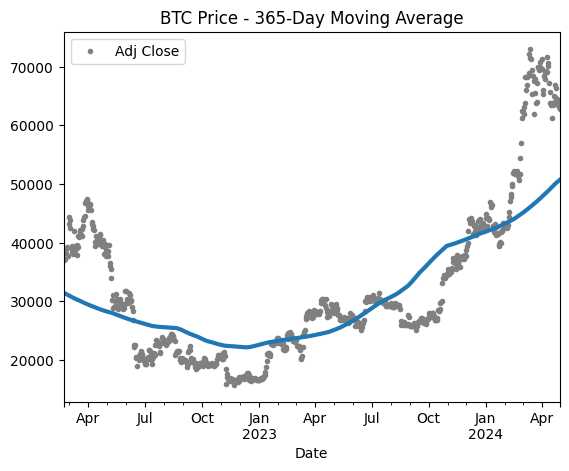

In [18]:
ax = df_copy.plot(style=".", color="0.5")
moving_average.plot(
    ax=ax, linewidth=3, title="BTC Price - 365-Day Moving Average", legend=False,
);

In [19]:
# Use daterministc process lib to engeniring the trend
from statsmodels.tsa.deterministic import DeterministicProcess

dp = DeterministicProcess(
    index=df_copy.index,
    order=2,
    constant=True,
    drop=True
)

X = dp.in_sample()
X.head()

,const,trend,trend_squared
Date,,,
2022-02-20,1.0,1.0,1.0
2022-02-21,1.0,2.0,4.0
2022-02-22,1.0,3.0,9.0
2022-02-23,1.0,4.0,16.0
2022-02-24,1.0,5.0,25.0


In [20]:
# Train linear regression with dp
from sklearn.linear_model import LinearRegression
y = df_copy['Adj Close']

model = LinearRegression(fit_intercept=False)
model.fit(X,y)

y_pred = pd.Series(model.predict(X), index=X.index)
y_pred.head()

Date
2022-02-20    42135.254312
2022-02-21    41996.515810
2022-02-22    41858.202906
2022-02-23    41720.315600
2022-02-24    41582.853892
dtype: float64

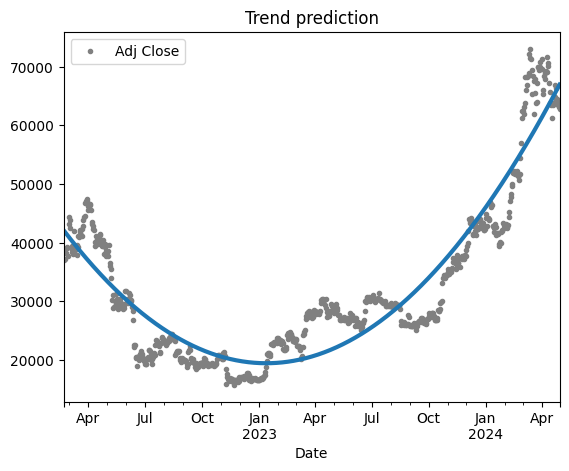

In [21]:
# Visualize learning trend
ax = df_copy.plot(style='.', color='0.5', title='Trend prediction')
_ = y_pred.plot(ax=ax, linewidth=3, label='Trend')

In [22]:
# create out o sample features and forecast 
dates = pd.date_range('2024-04-30', periods=90, freq='D')

X_fore = dp.out_of_sample(steps=90,forecast_index=dates)

y_fore = pd.Series(model.predict(X_fore), index=X_fore.index)

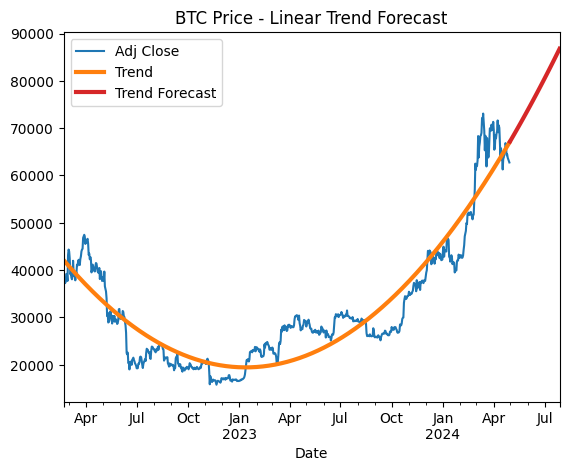

In [23]:
# Visualize forecast of trend
ax = df_copy["2022-02-20":].plot(title="BTC Price - Linear Trend Forecast")
ax = y_pred["2022-02-20":].plot(ax=ax, linewidth=3, label="Trend")
ax = y_fore.plot(ax=ax, linewidth=3, label="Trend Forecast", color="C3")
_ = ax.legend()